##### Copyright 2022 The TensorFlow Hub Authors.

Licensed under the Apache License, Version 2.0 (the "License");

In [1]:
#@title Copyright 2022 The TensorFlow Hub Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

<table class="tfo-notebook-buttons" align="left">
  <td><a target="_blank" href="https://www.tensorflow.org/hub/tutorials/hrnet_semantic_segmentation"><img src="https://www.tensorflow.org/images/tf_logo_32px.png">TensorFlow.org에서 보기</a></td>
  <td><a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/ko/hub/tutorials/hrnet_semantic_segmentation.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png">Google Colab에서 실행</a></td>
  <td><a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/ko/hub/tutorials/hrnet_semantic_segmentation.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png">GitHub에서 보기</a></td>
  <td><a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/ko/hub/tutorials/hrnet_semantic_segmentation.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png">노트북 다운로드</a></td>
  <td><a href="https://tfhub.dev/google/HRNet/"><img src="https://www.tensorflow.org/images/hub_logo_32px.png">TF Hub 모델 보기</a></td>
</table>

# 의미론적 세분화를 위한 HRNet 기반 모델

이 노트북에서 수행할 작업은 다음과 같습니다.

- 서로 다른 의미론적 세분화 데이터세트에서 17개의 사전 훈련된 HRNet 모델 중 하나를 선택하고 로드합니다.
- 추론을 실행하여 모델 백본에서 특성을 추출하고 모델 헤드에서 예측을 추출합니다.

In [2]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

2022-12-14 22:02:46.640653: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-12-14 22:02:46.640747: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-12-14 22:02:46.640757: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


## TensorFlow Hub에서 모델 로드하기

여기에서 로드할 사전 훈련된 HRNet 모델을 선택할 수 있습니다. 모델이 다르면 다른 훈련 데이터세트가 사용됨을 의미합니다. 훈련 데이터세트(dataset_output_classes)에 포함된 클래스 수에 따라 차원이 다른 모델 헤드를 제외하고 모든 모델은 동일한 아키텍처를 갖습니다. 다양한 데이터세트에 대한 자세한 내용은 위의 링크와 [데이터세트 수집에 영향을 미치는 요인](https://github.com/google-research/google-research/tree/master/factors_of_influence)을 참조하세요.

In [3]:
#@title Choose a pre-trained HRNet model to load.

hrnet_model_name = 'ade20k-hrnetv2-w48/1'  #@param ["ade20k-hrnetv2-w48/1", "isprs-hrnetv2-w48/1", "vkitti2-hrnetv2-w48/1", "vgallery-hrnetv2-w48/1", "sunrgbd-hrnetv2-w48/1", "suim-hrnetv2-w48/1", "scannet-hrnetv2-w48/1", "pvoc-hrnetv2-w48/1", "msegpcontext-hrnetv2-w48/1", "mapillary-hrnetv2-w48/1", "kitti-hrnetv2-w48/1", "isaid-hrnetv2-w48/1", "idd-hrnetv2-w48/1", "coco-hrnetv2-w48/1", "city-hrnetv2-w48/1", "camvid-hrnetv2-w48/1", "bdd-hrnetv2-w48/1"]

tfhub_model_name = 'https://tfhub.dev/google/HRNet/' + hrnet_model_name

print('HRNet model selected           :', tfhub_model_name)

HRNet model selected           : https://tfhub.dev/google/HRNet/ade20k-hrnetv2-w48/1


In [4]:
hrnet_model = hub.load(tfhub_model_name)

print('HRNet model loaded           :', tfhub_model_name)

HRNet model loaded           : https://tfhub.dev/google/HRNet/ade20k-hrnetv2-w48/1


## 이미지를 로드하고 및 추론 실행하기

이미지에서 특성과 예측을 추출하기 위한 추론을 실행하는 방법에 대한 데모입니다. 이미지는 scene150 데이터세트에서 가져왔습니다.

훈련 중에 사용된 데이터세트에 대한 추론을 수행하려면 [데이터세트 수집에 영향을 미치는 요인](https://github.com/google-research/google-research/tree/master/factors_of_influence)을 참조하세요.

In [5]:
img_file = tf.keras.utils.get_file(origin="https://tensorflow.org/images/bedroom_hrnet_tutorial.jpg")
img = np.array(Image.open(img_file))/255.0

 8192/67460 [==>...........................] - ETA: 0s

67460/67460 [==============================] - 0s 0us/step


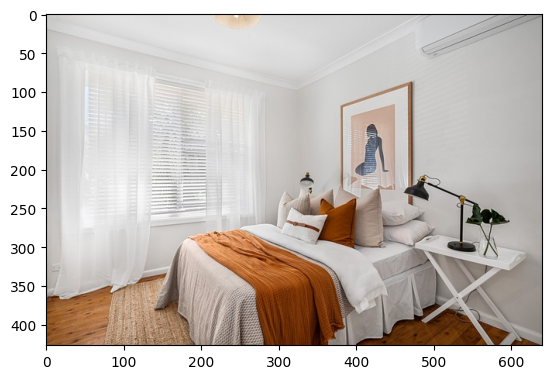

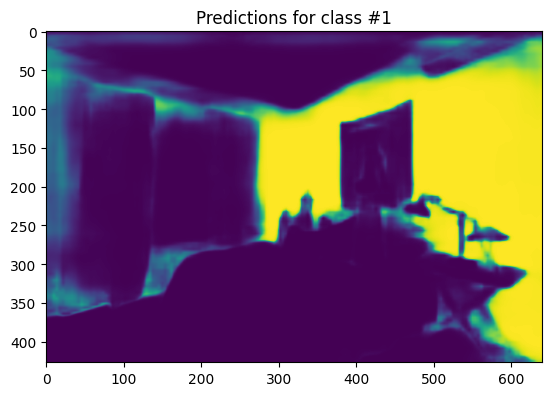

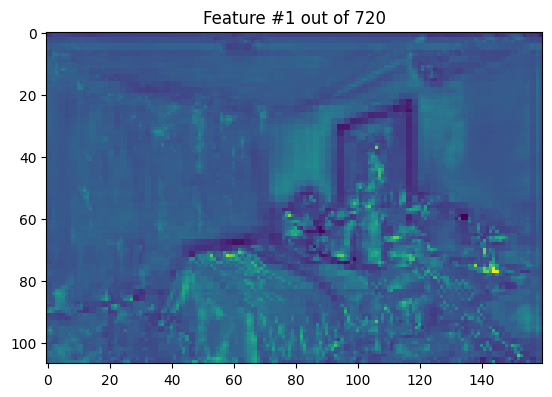

In [6]:
plt.imshow(img)
plt.show()

# Predictions will have shape (batch_size, h, w, dataset_output_classes)
predictions = hrnet_model.predict([img])
plt.imshow(predictions[0,:,:,1])
plt.title('Predictions for class #1')
plt.show() 
# Features will have shape (batch_size, h/4, w/4, 720)
features = hrnet_model.get_features([img])
plt.imshow(features[0,:,:,1])
plt.title('Feature #1 out of 720')
plt.show()